
# Laboratorio: Red Neuronal con MNIST  
**Curso:** Machine Learning  
**Total puntos:** 10

**Objetivo:** Implementar una red neuronal simple para clasificar dígitos escritos a mano del conjunto de datos MNIST utilizando Python y Keras.



## Paso 1: Cargar el conjunto de datos MNIST (1 punto)

Ejecuta el siguiente bloque para descargar y explorar el conjunto de datos.


In [4]:
from tensorflow.keras.datasets import mnist

# Cargar datos
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Tamaño del set de entrenamiento:", x_train.shape)
print("Tamaño del set de test:", x_test.shape)


Tamaño del set de entrenamiento: (60000, 28, 28)
Tamaño del set de test: (10000, 28, 28)



## Paso 2: Visualizar ejemplos del dataset (1 punto)

✏️ **Slot para completar:** Visualiza al menos 5 imágenes con sus etiquetas utilizando `matplotlib.pyplot.imshow()`.


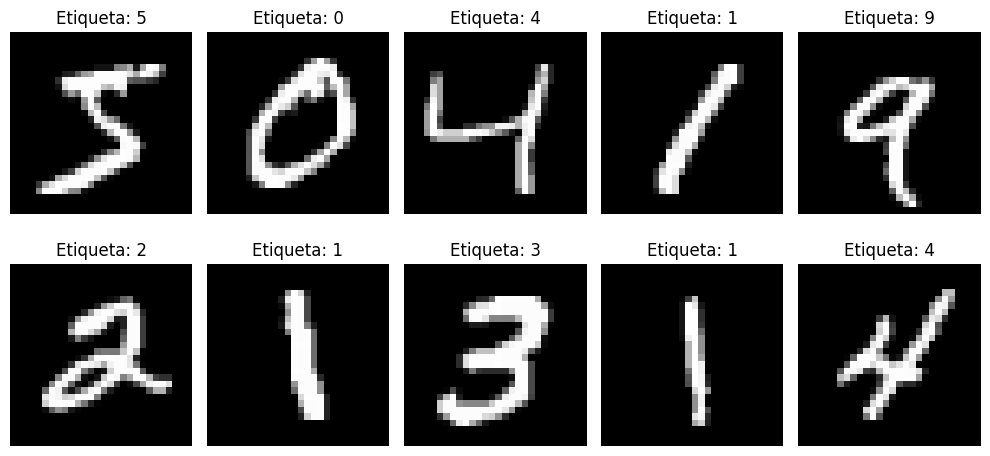

In [5]:

# COMPLETA AQUÍ: Visualización de imágenes con sus etiquetas
import matplotlib.pyplot as plt
import numpy as np
# Visualizar 10 imágenes de entrenamiento
n = 10
plt.figure(figsize=(10, 5))
for i in range(n):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Etiqueta: {y_train[i]}")
    plt.axis('off') 
plt.tight_layout()
plt.show()



## Paso 3: Preprocesamiento (1 punto)

✏️ **Slot para completar:** 
- Normaliza las imágenes (divide por 255.0).
- Aplana cada imagen a un vector de 784 valores.
- Codifica las etiquetas con `to_categorical`.


In [6]:

from tensorflow.keras.utils import to_categorical
# Normalizar imágenes
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
# - Aplana cada imagen a un vector de 784 valores.

x_train = x_train.reshape(x_train.shape[0], 28 * 28)
x_test = x_test.reshape(x_test.shape[0], 28 * 28)
print("Tamaño del set de entrenamiento después de aplanar:", x_train.shape)
print("Tamaño del set de test después de aplanar:", x_test.shape)

# Codifica las etiquetas con `to_categorical`.
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
print("Tamaño del set de entrenamiento después de codificar etiquetas:", y_train.shape)
print("Tamaño del set de test después de codificar etiquetas:", y_test.shape)




Tamaño del set de entrenamiento después de aplanar: (60000, 784)
Tamaño del set de test después de aplanar: (10000, 784)
Tamaño del set de entrenamiento después de codificar etiquetas: (60000, 10)
Tamaño del set de test después de codificar etiquetas: (10000, 10)



## Paso 4: Definir la red neuronal (2 puntos)

✏️ **Slot para completar:** 
- Crea un modelo `Sequential`.
- Agrega una capa oculta con activación ReLU.
- Agrega una capa de salida con activación Softmax.
- Compila el modelo con `adam` y `categorical_crossentropy`.


In [7]:

# COMPLETA AQUÍ: Definición y compilación del modelo
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()

model = Sequential()
model.add(Dense(784, input_shape=(784,), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


c:\Users\gusta\Documents\Gitkraken\Laboratorio_red_neuronal\python310env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



## Paso 5: Entrenar el modelo (1 punto)

✏️ **Slot para completar:** Entrena el modelo con `fit` durante 5 épocas y batch size 32.


In [ ]:

# COMPLETA AQUÍ: Entrenamiento del modelo
# Entrena el modelo con `fit` durante 5 épocas y batch size 32.
print("y_train shape:", y_train.shape)  
print("y_test shape:", y_test.shape)    #
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)


y_train shape: (60000, 10)
y_test shape: (10000, 10)
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8946 - loss: 0.3437 - val_accuracy: 0.9659 - val_loss: 0.1095
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9729 - loss: 0.0851 - val_accuracy: 0.9712 - val_loss: 0.1013
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9845 - loss: 0.0515 - val_accuracy: 0.9738 - val_loss: 0.0931
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9871 - loss: 0.0380 - val_accuracy: 0.9750 - val_loss: 0.0885
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9898 - loss: 0.0314 - val_accuracy: 0.9777 - val_loss: 0.0892



## Paso 6: Evaluar el modelo (1 punto)

✏️ **Slot para completar:** Evalúa el modelo con `evaluate()` en el conjunto de prueba.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9741 - loss: 0.0991
Pérdida en el conjunto de prueba: 0.08360268920660019
Precisión en el conjunto de prueba: 0.9779000282287598


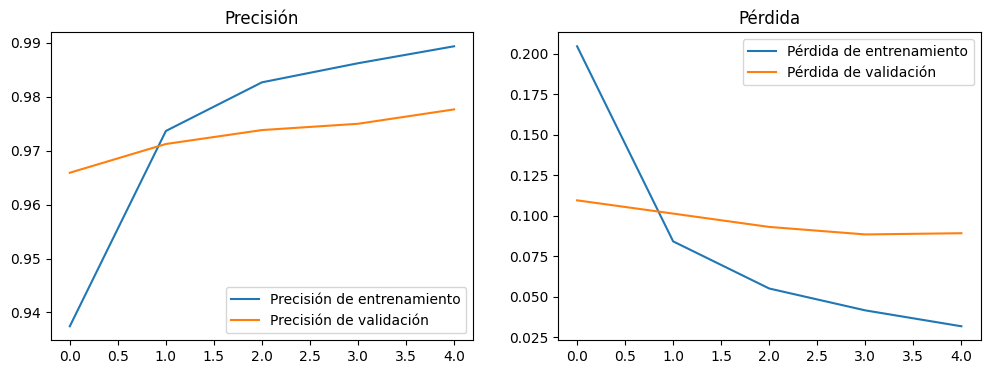

In [ ]:

# COMPLETA AQUÍ: Evaluación del modelo
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Pérdida en el conjunto de prueba:", test_loss)
print("Precisión en el conjunto de prueba:", test_accuracy)
# Visualiza la precisión y la pérdida durante el entrenamiento
plt.figure(figsize=(12, 4))

# Subgráfico de Precisión
ax1 = plt.subplot(1, 2, 1)
ax1.plot(history.history['accuracy'], label='Precisión de entrenamiento')
ax1.plot(history.history['val_accuracy'], label='Precisión de validación')
ax1.set_title("Precisión")
ax1.legend()

# Subgráfico de Pérdida
ax2 = plt.subplot(1, 2, 2)
ax2.plot(history.history['loss'], label='Pérdida de entrenamiento')
ax2.plot(history.history['val_loss'], label='Pérdida de validación')
ax2.set_title("Pérdida")
ax2.legend()

plt.show()


## Preguntas de Reflexión (3 puntos en total)

### 1. ¿Qué ventaja observas al usar codificación one-hot para las etiquetas? (0.5 punto)

una de las ventajas es que la codificacion one-hot representa las etiquetas de manera que cada clase se transforma en un vercot binario sin orden, esto evita que el modelo interprete las etiquetas como números ordinales, lo que podría llevar a confusiones en la predicción. Por ejemplo, si tuviéramos etiquetas 0, 1, 2, 3, el modelo podría pensar que 3 es "más" que 2. Con one-hot esto no sucede.


### 2. ¿Qué ocurre si aumentas o disminuyes el número de neuronas ocultas? (0.5 punto)

Si aumenta el número de neuronas ocultas, el modelo puede aprender patrones más complejos, pero también incurre en un riesgo mayor de sobreajuste y mayores tiempos de entrenamiento si no se regula adecuadamente. Por otro lado, disminuirlas reduce la complejidad del modelo, lo que podría derivar en subajuste.

### 3. ¿Qué alternativa propondrías al optimizador `adam` y por qué? (0.5 punto)

Adam combina las ventajas de RMSprop y el momentum, ajustando la tasa de aprendizaje de forma adaptativa y acelerando la convergencia. Es muy popular por su eficiencia en distintos problemas, pero a veces puede generalizar peor en comparación con métodos más simples.

RMSprop ajusta la tasa de aprendizaje con base en una media móvil de los cuadrados de los gradientes. Es adecuado para problemas no estacionarios y suele ser menos sensible a la elección del learning rate aunque no incorpora momentum de forma directa.


### 4. ¿Cómo cambia el desempeño si entrenas más épocas? ¿Cuál es el riesgo? (0.5 punto)

Entrenar por más épocas mejora la precisión en el conjunto de entrenamiento, pero incrementa el riesgo de sobreajuste. Esto significa que el modelo aprende demasiado bien los patrones específicos de los datos de entrenamiento, lo que puede deteriorar su desempeño en datos nuevos o en el conjunto de validación.

### 5. ¿Por qué es importante dividir en conjuntos de entrenamiento y prueba? (1 punto)

Dividir en conjuntos de entrenamiento y prueba es crucial para evaluar cómo se comportará el modelo en datos no vistos. Esto permite detectar sobreajuste, ya que un modelo que se desempeña bien en el entrenamiento pero mal en el conjunto de prueba puede haber memorizado los datos en lugar de aprender patrones generalizables